In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

4423680/4422102 [==============================] - 0s 0us/step
Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

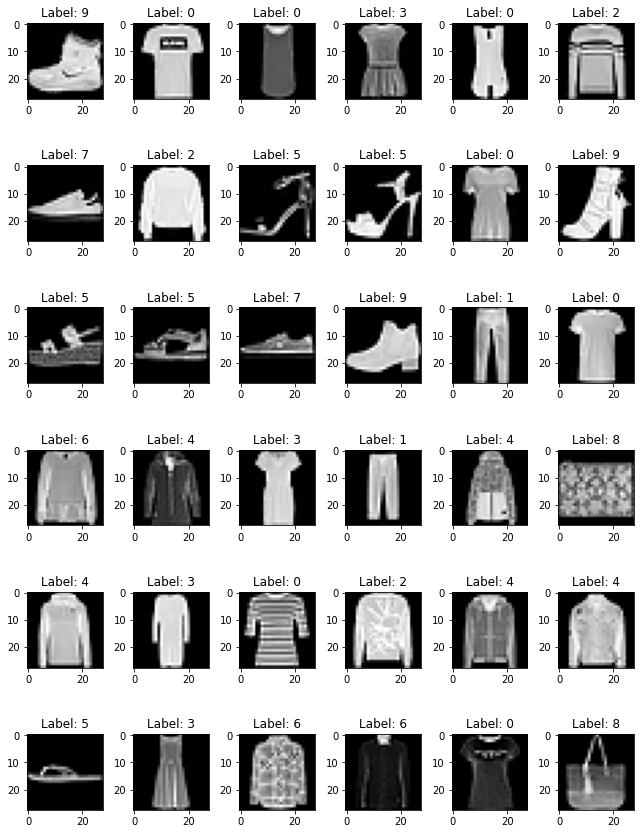

In [ ]:
# specify the number of rows and columns you want to see
num_row = 6
num_col = 6

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X = X_train.reshape(60000,784)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(4), random_state=1,max_iter = 100)

clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = clf.predict(X_test.reshape(10000,784))

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [ ]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(Y_test,y_pred,labels=np.unique(Y_test))
cm

array([[803,   3,  13,  92,   5,   0,  68,   0,  16,   0],
       [  0, 929,   7,  44,   9,   0,   3,   4,   4,   0],
       [ 30,   2, 689,  14, 153,   2,  95,   0,  15,   0],
       [ 43,  13,   8, 868,  25,   0,  36,   0,   7,   0],
       [  2,   0, 116,  38, 729,   0, 104,   0,   8,   3],
       [  0,   0,   3,   0,   0, 897,   0,  53,  13,  34],
       [201,   2, 149,  70, 103,   3, 449,   0,  22,   1],
       [  0,   0,   0,   0,   0,  31,   0, 942,   0,  27],
       [ 27,   3,  10,   7,   3,   2,   8,   5, 935,   0],
       [  0,   0,   4,   0,   0,  18,   1,  55,   1, 921]])

In [ ]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8162


In [ ]:
print(classification_report(Y_test,y_pred,labels=np.unique(Y_test),target_names=class_names))

'              precision    recall  f1-score   support\n\n T-shirt/top       0.73      0.80      0.76      1000\n     Trouser       0.98      0.93      0.95      1000\n    Pullover       0.69      0.69      0.69      1000\n       Dress       0.77      0.87      0.81      1000\n        Coat       0.71      0.73      0.72      1000\n      Sandal       0.94      0.90      0.92      1000\n       Shirt       0.59      0.45      0.51      1000\n     Sneaker       0.89      0.94      0.92      1000\n         Bag       0.92      0.94      0.93      1000\n  Ankle boot       0.93      0.92      0.93      1000\n\n    accuracy                           0.82     10000\n   macro avg       0.81      0.82      0.81     10000\nweighted avg       0.81      0.82      0.81     10000\n'